## Spain Electricity Machine Learning

#### 1. Importing important data viz. and number manipulation libraries

In [1]:
#number manipulation
import numpy as np
import pandas as pd

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#figure size parameter
#plt.rcParams['figure.figsize'] = [4, 4]

#### 2. Loading the data

we should loading the data into a github repo so that we can all access it

In [2]:
#loading the train dataset and assigning it into the df variable
df = pd.read_csv("./df_train.csv")
#show first 5 rows of the df
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


#### 3. Investigating the data

In [3]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

#### 4. GROUP BY cities

#### 4.1 Valencia
*Emmanuel*

Creating a Valencia subset.

In [13]:
valencia_df = df[["time", "Valencia_wind_deg", "Valencia_wind_speed", "Valencia_snow_3h",
          "Valencia_pressure", "Valencia_temp_max", "Valencia_temp", "Valencia_humidity",
          "Valencia_temp_min", "load_shortfall_3h"]]

valencia_df.head()


,time,Valencia_wind_deg,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_humidity,Valencia_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,level_5,0.666667,0.0,1002.666667,269.888000,269.888000,75.666667,269.888000,6715.666667
1,2015-01-01 06:00:00,level_10,1.666667,0.0,1004.333333,271.728333,271.728333,71.000000,271.728333,4171.666667
2,2015-01-01 09:00:00,level_9,1.000000,0.0,1005.333333,278.008667,278.008667,65.666667,278.008667,4274.666667
3,2015-01-01 12:00:00,level_8,1.000000,0.0,1009.000000,284.899552,284.899552,54.000000,284.899552,5075.666667
4,2015-01-01 15:00:00,level_7,1.000000,0.0,NaN,283.015115,283.015115,58.333333,283.015115,6620.666667


In the Valencia subset above, taking look at the "Valencia_pressure" column row number 4. There is a missing value, so now lets perform an in depth analysis for missing values to the entire data.

In [14]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

The above results shows that all cities have no missing values excluding Valencia city. Then now that we have only one column with missing values in the Valencia subset and it contains numerical data, we can simlpy replace the missing values with the mean.

In [19]:
# Calcuting the mean of the Valencia_pressure column
mean_v = df["Valencia_pressure"].mean()

In [20]:
print("mean",mean_v)

mean 1012.0514065222828


In [23]:
# Replacing missing values in the Valencia_pressure column with the mean calculated above
df["Valencia_pressure"].fillna(value = mean_v,\
                                     inplace = True)

In [26]:
# Verifying if the missing values were successfully replaced
df[["Valencia_pressure"]].iloc[0:7,:]

,Valencia_pressure
0,1002.666667
1,1004.333333
2,1005.333333
3,1009.000000
4,1012.051407
5,1012.051407
6,1006.000000


By looking at the "	Valencia_pressure" column row number 4 and 5 above, it shows that we have successfully replaced the missing values with the mean of the column.

Now lets assess the correlation of the Valencia subset.

In [29]:
valencia_df.corr()

,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_humidity,Valencia_temp_min,load_shortfall_3h
Valencia_wind_speed,1.000000,0.058629,-0.041408,0.065815,0.072366,-0.413017,0.075533,-0.142791
Valencia_snow_3h,0.058629,1.000000,-0.027016,-0.027693,-0.027452,-0.019085,-0.026649,-0.021633
Valencia_pressure,-0.041408,-0.027016,1.000000,0.114845,0.087385,-0.021253,0.055783,0.086022
Valencia_temp_max,0.065815,-0.027693,0.114845,1.000000,0.987533,-0.399380,0.949377,0.144270
Valencia_temp,0.072366,-0.027452,0.087385,0.987533,1.000000,-0.413654,0.985479,0.173225
Valencia_humidity,-0.413017,-0.019085,-0.021253,-0.399380,-0.413654,1.000000,-0.413537,0.043140
Valencia_temp_min,0.075533,-0.026649,0.055783,0.949377,0.985479,-0.413537,1.000000,0.201863
load_shortfall_3h,-0.142791,-0.021633,0.086022,0.144270,0.173225,0.043140,0.201863,1.000000


<AxesSubplot:>

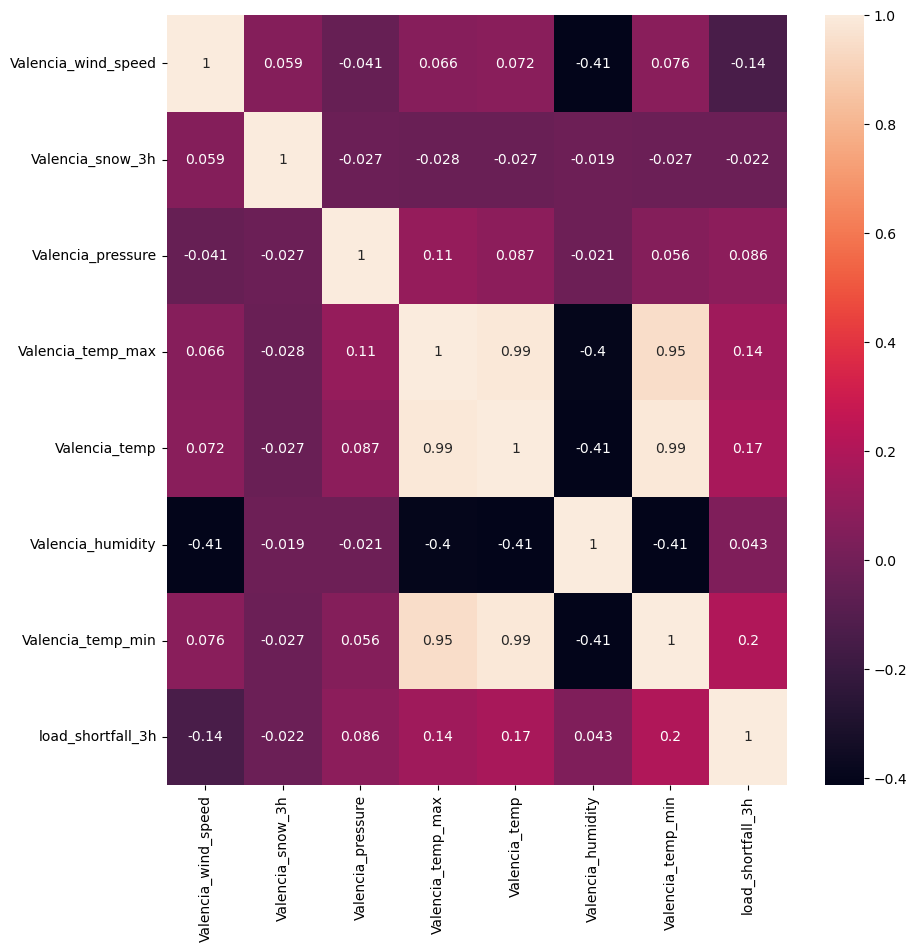

In [30]:
# Using heatmap

fig, ax = plt.subplots(figsize=(10, 10))
corrValencia_df = valencia_df.corr()
sns.heatmap(corrValencia_df, annot=True)


|   Pearson Correlation Coefficient (r)  |       Description of Relationship     |
|:-------------------|:---------------:|
|  r = -1              |Perfect Negative Correlation |
| -1 < r < -0.8 | Strong Negative Correlation  | 
| - 0.8 < r < -0.5             | Moderate Negative Correlation  | 
|       - 0.5 < r < 0     |Weak Negative Correlation  | 
|       r = 0  |No Linear Correlation | 
| 0 < r < 0.5 | Weak Positive Correlation  | 
| 0.5 < r < 0.8             | Moderate Positive Correlation  | 
|       0.8 < r < 1     |Strong Positive Correlation  | 
|       r = 1  |Perfect Positive Correlation | 


In the **heatmap** above, the column Valencia_humidity has weak negative & positive Correlation which I percieve it has an effect on the load_short column.

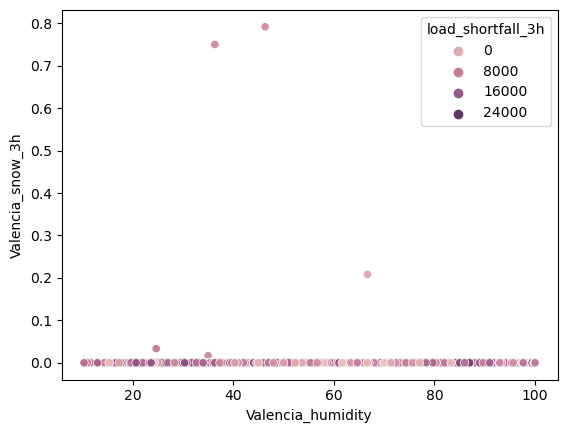

In [36]:
# Using a scatterplot
sns.scatterplot(x='Valencia_humidity',y='Valencia_snow_3h',hue='load_shortfall_3h', data=df);

As indicated by the low correlation coefficient value of **- 0.019** and now the scatterplot, there is a very weak relationship between Valencia_humidity and Valencia_snow_3h.